In [5]:
!pip install numpy_financial
import pandas as pd
import seaborn as sns
import numpy as np
import numpy_financial as npf

# 1. EDA

In [6]:
dados = pd.read_csv('weg_detalhado_dre.csv', sep=';', skiprows=1)
dados.set_index('Descrição da Conta', inplace= True)
dados = dados.replace([',','- '],['.',0], regex=True).astype(float)

In [7]:
dados.head(10)

,2009,1T10,2T10,3T10,4T10,1T11,2T11,3T11,4T11,1T12,2T12,3T12,4T12,1T13,2T13,3T13,4T13,1T14,2T14,3T14,4T14,1T15,2T15,3T15,4T15,1T16,2T16,3T16,4T16,1T17,2T17,3T17,4T17,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20
Descrição da Conta,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Receita de Venda de Bens e/ou Serviços,4210.60,931.90,1013.00,1188.60,1258.40,1126.10,1277.30,1317.50,1468.60,1369.80,1528.80,1613.10,1662.30,1477.60,1699.60,1758.40,1893.30,1783.50,1821.50,2056.00,2179.70,2130.30,2349.40,2546.30,2734.30,2416.30,2335.30,2238.10,2377.30,2134.20,2280.80,2435.10,2673.70,2551.50,3056.60,3237.30,3124.70,2932.40,3286.60,3349.60,3778.80,3714.40,4063.90,4801.30,4889.90
Mercado Interno (Nota explicativa 22),2526.40,614.50,629.10,690.40,736.40,660.30,723.30,737.40,781.90,714.30,729.20,798.60,774.50,772.90,873.40,872.40,913.40,895.40,900.30,994.10,1086.90,1027.90,1051.50,1087.40,1060.50,994.80,947.20,991.10,1069.10,990.90,972.60,1008.20,1232.00,1128.60,1318.90,1375.40,1259.70,1252.20,1289.70,1378.10,1643.10,1692.40,1604.20,2085.20,2248.00
Mercado Externo (Nota explicativa 22),1684.20,317.40,384.00,498.20,522.00,465.80,553.90,580.10,686.60,655.50,799.60,814.40,887.70,704.60,826.30,886.00,979.90,888.10,921.20,1061.90,1092.80,1102.40,1297.90,1459.00,1673.70,1421.50,1388.00,1247.00,1308.20,1143.30,1308.20,1426.90,1441.80,1422.90,1737.70,1861.90,1864.90,1680.20,1996.90,1971.50,2135.80,2022.00,2459.70,2716.00,2642.00
,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Custo dos Bens e/ou Serviços Vendidos,-2854.20,-623.30,-703.20,-811.40,-867.10,-815.50,-895.80,-899.20,-1022.90,-977.80,-1067.40,-1114.50,-1133.50,-1014.00,-1141.60,-1159.20,-1277.30,-1213.10,-1244.20,-1417.40,-1481.50,-1491.70,-1677.70,-1821.50,-2003.80,-1743.60,-1693.60,-1619.10,-1674.90,-1496.90,-1599.70,-1701.90,-1967.00,-1827.90,-2177.70,-2288.30,-2207.00,-2074.80,-2341.30,-2344.40,-2633.60,-2616.90,-2831.80,-3289.70,-3293.60
Materiais,0.65,0.63,0.61,0.62,0.64,0.64,0.65,0.65,0.66,0.64,0.63,0.64,0.65,0.64,0.63,0.64,0.64,0.65,0.64,0.65,0.65,0.65,0.64,0.65,0.66,0.65,0.64,0.64,0.66,0.63,0.63,0.64,0.68,0.66,0.67,0.67,0.68,0.64,0.64,0.65,0.70,0.64,0.68,0.70,0.69
Pessoal,0.20,0.25,0.24,0.23,0.22,0.22,0.22,0.22,0.21,0.23,0.23,0.22,0.21,0.23,0.23,0.22,0.22,0.23,0.23,0.22,0.22,0.21,0.21,0.21,0.20,0.21,0.22,0.21,0.20,0.23,0.23,0.22,0.19,0.22,0.21,0.21,0.20,0.24,0.23,0.23,0.20,0.23,0.20,0.19,0.20
Depreciação,0.05,0.04,0.06,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.04,0.05,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.05,0.04,0.04,0.04,0.04,0.05,0.05,0.05,0.04,0.04,0.04,0.03,0.04,0.03,0.03,0.03,0.04,0.04,0.04,0.03,0.04,0.03,0.03,0.03


In [8]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, nan to nan
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2009    83 non-null     float64
 1   1T10    83 non-null     float64
 2   2T10    83 non-null     float64
 3   3T10    83 non-null     float64
 4   4T10    83 non-null     float64
 5   1T11    83 non-null     float64
 6   2T11    83 non-null     float64
 7   3T11    83 non-null     float64
 8   4T11    83 non-null     float64
 9   1T12    83 non-null     float64
 10  2T12    83 non-null     float64
 11  3T12    83 non-null     float64
 12  4T12    83 non-null     float64
 13  1T13    83 non-null     float64
 14  2T13    83 non-null     float64
 15  3T13    83 non-null     float64
 16  4T13    83 non-null     float64
 17  1T14    83 non-null     float64
 18  2T14    83 non-null     float64
 19  3T14    83 non-null     float64
 20  4T14    83 non-null     float64
 21  1T15    83 non-null     float64
 22  2T15 

In [9]:
dados.dropna(inplace=True)
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries,  Receita de Venda de Bens e/ou Serviços  to Resultado da equivalência patrimonial
Data columns (total 45 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2009    81 non-null     float64
 1   1T10    81 non-null     float64
 2   2T10    81 non-null     float64
 3   3T10    81 non-null     float64
 4   4T10    81 non-null     float64
 5   1T11    81 non-null     float64
 6   2T11    81 non-null     float64
 7   3T11    81 non-null     float64
 8   4T11    81 non-null     float64
 9   1T12    81 non-null     float64
 10  2T12    81 non-null     float64
 11  3T12    81 non-null     float64
 12  4T12    81 non-null     float64
 13  1T13    81 non-null     float64
 14  2T13    81 non-null     float64
 15  3T13    81 non-null     float64
 16  4T13    81 non-null     float64
 17  1T14    81 non-null     float64
 18  2T14    81 non-null     float64
 19  3T14    81 non-null     float64
 20  4T14    8

In [10]:
dados.head()

,2009,1T10,2T10,3T10,4T10,1T11,2T11,3T11,4T11,1T12,2T12,3T12,4T12,1T13,2T13,3T13,4T13,1T14,2T14,3T14,4T14,1T15,2T15,3T15,4T15,1T16,2T16,3T16,4T16,1T17,2T17,3T17,4T17,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20
Descrição da Conta,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Receita de Venda de Bens e/ou Serviços,4210.60,931.90,1013.00,1188.60,1258.40,1126.10,1277.30,1317.50,1468.60,1369.80,1528.80,1613.10,1662.30,1477.60,1699.60,1758.40,1893.30,1783.50,1821.50,2056.00,2179.70,2130.30,2349.40,2546.30,2734.30,2416.30,2335.30,2238.10,2377.30,2134.20,2280.80,2435.10,2673.70,2551.50,3056.60,3237.30,3124.70,2932.40,3286.60,3349.60,3778.8,3714.40,4063.90,4801.3,4889.90
Mercado Interno (Nota explicativa 22),2526.40,614.50,629.10,690.40,736.40,660.30,723.30,737.40,781.90,714.30,729.20,798.60,774.50,772.90,873.40,872.40,913.40,895.40,900.30,994.10,1086.90,1027.90,1051.50,1087.40,1060.50,994.80,947.20,991.10,1069.10,990.90,972.60,1008.20,1232.00,1128.60,1318.90,1375.40,1259.70,1252.20,1289.70,1378.10,1643.1,1692.40,1604.20,2085.2,2248.00
Mercado Externo (Nota explicativa 22),1684.20,317.40,384.00,498.20,522.00,465.80,553.90,580.10,686.60,655.50,799.60,814.40,887.70,704.60,826.30,886.00,979.90,888.10,921.20,1061.90,1092.80,1102.40,1297.90,1459.00,1673.70,1421.50,1388.00,1247.00,1308.20,1143.30,1308.20,1426.90,1441.80,1422.90,1737.70,1861.90,1864.90,1680.20,1996.90,1971.50,2135.8,2022.00,2459.70,2716.0,2642.00
Custo dos Bens e/ou Serviços Vendidos,-2854.20,-623.30,-703.20,-811.40,-867.10,-815.50,-895.80,-899.20,-1022.90,-977.80,-1067.40,-1114.50,-1133.50,-1014.00,-1141.60,-1159.20,-1277.30,-1213.10,-1244.20,-1417.40,-1481.50,-1491.70,-1677.70,-1821.50,-2003.80,-1743.60,-1693.60,-1619.10,-1674.90,-1496.90,-1599.70,-1701.90,-1967.00,-1827.90,-2177.70,-2288.30,-2207.00,-2074.80,-2341.30,-2344.40,-2633.6,-2616.90,-2831.80,-3289.7,-3293.60
Materiais,0.65,0.63,0.61,0.62,0.64,0.64,0.65,0.65,0.66,0.64,0.63,0.64,0.65,0.64,0.63,0.64,0.64,0.65,0.64,0.65,0.65,0.65,0.64,0.65,0.66,0.65,0.64,0.64,0.66,0.63,0.63,0.64,0.68,0.66,0.67,0.67,0.68,0.64,0.64,0.65,0.7,0.64,0.68,0.7,0.69


## 1.1 EDA - Custos


***
Exploratory Data Analysis to costs


In [11]:
dados.head(9)

,2009,1T10,2T10,3T10,4T10,1T11,2T11,3T11,4T11,1T12,2T12,3T12,4T12,1T13,2T13,3T13,4T13,1T14,2T14,3T14,4T14,1T15,2T15,3T15,4T15,1T16,2T16,3T16,4T16,1T17,2T17,3T17,4T17,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20
Descrição da Conta,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Receita de Venda de Bens e/ou Serviços,4210.60,931.90,1013.00,1188.60,1258.40,1126.10,1277.30,1317.50,1468.60,1369.80,1528.80,1613.10,1662.30,1477.60,1699.60,1758.40,1893.30,1783.50,1821.50,2056.00,2179.70,2130.30,2349.40,2546.30,2734.30,2416.30,2335.30,2238.10,2377.30,2134.20,2280.80,2435.10,2673.70,2551.50,3056.60,3237.30,3124.70,2932.40,3286.60,3349.60,3778.80,3714.40,4063.90,4801.30,4889.90
Mercado Interno (Nota explicativa 22),2526.40,614.50,629.10,690.40,736.40,660.30,723.30,737.40,781.90,714.30,729.20,798.60,774.50,772.90,873.40,872.40,913.40,895.40,900.30,994.10,1086.90,1027.90,1051.50,1087.40,1060.50,994.80,947.20,991.10,1069.10,990.90,972.60,1008.20,1232.00,1128.60,1318.90,1375.40,1259.70,1252.20,1289.70,1378.10,1643.10,1692.40,1604.20,2085.20,2248.00
Mercado Externo (Nota explicativa 22),1684.20,317.40,384.00,498.20,522.00,465.80,553.90,580.10,686.60,655.50,799.60,814.40,887.70,704.60,826.30,886.00,979.90,888.10,921.20,1061.90,1092.80,1102.40,1297.90,1459.00,1673.70,1421.50,1388.00,1247.00,1308.20,1143.30,1308.20,1426.90,1441.80,1422.90,1737.70,1861.90,1864.90,1680.20,1996.90,1971.50,2135.80,2022.00,2459.70,2716.00,2642.00
Custo dos Bens e/ou Serviços Vendidos,-2854.20,-623.30,-703.20,-811.40,-867.10,-815.50,-895.80,-899.20,-1022.90,-977.80,-1067.40,-1114.50,-1133.50,-1014.00,-1141.60,-1159.20,-1277.30,-1213.10,-1244.20,-1417.40,-1481.50,-1491.70,-1677.70,-1821.50,-2003.80,-1743.60,-1693.60,-1619.10,-1674.90,-1496.90,-1599.70,-1701.90,-1967.00,-1827.90,-2177.70,-2288.30,-2207.00,-2074.80,-2341.30,-2344.40,-2633.60,-2616.90,-2831.80,-3289.70,-3293.60
Materiais,0.65,0.63,0.61,0.62,0.64,0.64,0.65,0.65,0.66,0.64,0.63,0.64,0.65,0.64,0.63,0.64,0.64,0.65,0.64,0.65,0.65,0.65,0.64,0.65,0.66,0.65,0.64,0.64,0.66,0.63,0.63,0.64,0.68,0.66,0.67,0.67,0.68,0.64,0.64,0.65,0.70,0.64,0.68,0.70,0.69
Pessoal,0.20,0.25,0.24,0.23,0.22,0.22,0.22,0.22,0.21,0.23,0.23,0.22,0.21,0.23,0.23,0.22,0.22,0.23,0.23,0.22,0.22,0.21,0.21,0.21,0.20,0.21,0.22,0.21,0.20,0.23,0.23,0.22,0.19,0.22,0.21,0.21,0.20,0.24,0.23,0.23,0.20,0.23,0.20,0.19,0.20
Depreciação,0.05,0.04,0.06,0.05,0.05,0.05,0.05,0.05,0.04,0.04,0.04,0.04,0.04,0.05,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.05,0.04,0.04,0.04,0.04,0.05,0.05,0.05,0.04,0.04,0.04,0.03,0.04,0.03,0.03,0.03,0.04,0.04,0.04,0.03,0.04,0.03,0.03,0.03
Outros,0.10,0.09,0.10,0.10,0.10,0.09,0.09,0.09,0.09,0.08,0.09,0.09,0.09,0.09,0.10,0.10,0.10,0.08,0.09,0.09,0.09,0.09,0.10,0.11,0.10,0.09,0.09,0.10,0.10,0.10,0.10,0.10,0.09,0.09,0.09,0.10,0.09,0.09,0.09,0.09,0.07,0.09,0.09,0.08,0.08
Resultado Bruto,1356.40,308.60,309.80,377.20,391.30,310.70,381.40,418.30,445.70,391.90,461.40,498.50,528.80,463.60,558.00,599.20,616.00,570.40,577.30,638.50,698.20,638.60,671.70,724.80,730.40,672.80,641.70,619.00,702.40,637.40,681.10,733.20,706.80,723.60,879.00,949.00,917.70,857.60,945.30,1005.20,1145.20,1097.50,1232.10,1511.60,1596.30


In [12]:
conversao_valores_materiais = dados.loc['Materiais']*dados.loc[' Custo dos Bens e/ou Serviços Vendidos ']

In [13]:
conversao_valores_pessoal = dados.loc['Pessoal']*dados.loc[' Custo dos Bens e/ou Serviços Vendidos ']

In [14]:
conversao_valores_depreciacao = dados.loc['Depreciação']*dados.loc[' Custo dos Bens e/ou Serviços Vendidos ']

In [15]:
conversao_valores_outros = dados.loc['Outros']*dados.loc[' Custo dos Bens e/ou Serviços Vendidos ']

In [16]:
dados.loc['Materiais'] = conversao_valores_materiais

In [17]:
 dados.loc['Pessoal'] = conversao_valores_pessoal

In [18]:
 dados.loc['Depreciação'] = conversao_valores_depreciacao

In [19]:
dados.loc['Outros'] = conversao_valores_outros

In [20]:
dados.head(9)

,2009,1T10,2T10,3T10,4T10,1T11,2T11,3T11,4T11,1T12,2T12,3T12,4T12,1T13,2T13,3T13,4T13,1T14,2T14,3T14,4T14,1T15,2T15,3T15,4T15,1T16,2T16,3T16,4T16,1T17,2T17,3T17,4T17,1T18,2T18,3T18,4T18,1T19,2T19,3T19,4T19,1T20,2T20,3T20,4T20
Descrição da Conta,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Receita de Venda de Bens e/ou Serviços,4210.60,931.900,1013.000,1188.600,1258.400,1126.100,1277.300,1317.500,1468.600,1369.800,1528.800,1613.100,1662.300,1477.60,1699.600,1758.400,1893.300,1783.500,1821.500,2056.000,2179.700,2130.300,2349.400,2546.300,2734.300,2416.300,2335.300,2238.100,2377.300,2134.200,2280.800,2435.100,2673.70,2551.500,3056.600,3237.300,3124.70,2932.400,3286.600,3349.600,3778.800,3714.400,4063.900,4801.300,4889.900
Mercado Interno (Nota explicativa 22),2526.40,614.500,629.100,690.400,736.400,660.300,723.300,737.400,781.900,714.300,729.200,798.600,774.500,772.90,873.400,872.400,913.400,895.400,900.300,994.100,1086.900,1027.900,1051.500,1087.400,1060.500,994.800,947.200,991.100,1069.100,990.900,972.600,1008.200,1232.00,1128.600,1318.900,1375.400,1259.70,1252.200,1289.700,1378.100,1643.100,1692.400,1604.200,2085.200,2248.000
Mercado Externo (Nota explicativa 22),1684.20,317.400,384.000,498.200,522.000,465.800,553.900,580.100,686.600,655.500,799.600,814.400,887.700,704.60,826.300,886.000,979.900,888.100,921.200,1061.900,1092.800,1102.400,1297.900,1459.000,1673.700,1421.500,1388.000,1247.000,1308.200,1143.300,1308.200,1426.900,1441.80,1422.900,1737.700,1861.900,1864.90,1680.200,1996.900,1971.500,2135.800,2022.000,2459.700,2716.000,2642.000
Custo dos Bens e/ou Serviços Vendidos,-2854.20,-623.300,-703.200,-811.400,-867.100,-815.500,-895.800,-899.200,-1022.900,-977.800,-1067.400,-1114.500,-1133.500,-1014.00,-1141.600,-1159.200,-1277.300,-1213.100,-1244.200,-1417.400,-1481.500,-1491.700,-1677.700,-1821.500,-2003.800,-1743.600,-1693.600,-1619.100,-1674.900,-1496.900,-1599.700,-1701.900,-1967.00,-1827.900,-2177.700,-2288.300,-2207.00,-2074.800,-2341.300,-2344.400,-2633.600,-2616.900,-2831.800,-3289.700,-3293.600
Materiais,-1855.23,-392.679,-428.952,-503.068,-554.944,-521.920,-582.270,-584.480,-675.114,-625.792,-672.462,-713.280,-736.775,-648.96,-719.208,-741.888,-817.472,-788.515,-796.288,-921.310,-962.975,-969.605,-1073.728,-1183.975,-1322.508,-1133.340,-1083.904,-1036.224,-1105.434,-943.047,-1007.811,-1089.216,-1337.56,-1206.414,-1459.059,-1533.161,-1500.76,-1327.872,-1498.432,-1523.860,-1843.520,-1674.816,-1925.624,-2302.790,-2272.584
Pessoal,-570.84,-155.825,-168.768,-186.622,-190.762,-179.410,-197.076,-197.824,-214.809,-224.894,-245.502,-245.190,-238.035,-233.22,-262.568,-255.024,-281.006,-279.013,-286.166,-311.828,-325.930,-313.257,-352.317,-382.515,-400.760,-366.156,-372.592,-340.011,-334.980,-344.287,-367.931,-374.418,-373.73,-402.138,-457.317,-480.543,-441.40,-497.952,-538.499,-539.212,-526.720,-601.887,-566.360,-625.043,-658.720
Depreciação,-142.71,-24.932,-42.192,-40.570,-43.355,-40.775,-44.790,-44.960,-40.916,-39.112,-42.696,-44.580,-45.340,-50.70,-45.664,-46.368,-51.092,-48.524,-49.768,-56.696,-59.260,-74.585,-67.108,-72.860,-80.152,-69.744,-84.680,-80.955,-83.745,-59.876,-63.988,-68.076,-59.01,-73.116,-65.331,-68.649,-66.21,-82.992,-93.652,-93.776,-79.008,-104.676,-84.954,-98.691,-98.808
Outros,-285.42,-56.097,-70.320,-81.140,-86.710,-73.395,-80.622,-80.928,-92.061,-78.224,-96.066,-100.305,-102.015,-91.26,-114.160,-115.920,-127.730,-97.048,-111.978,-127.566,-133.335,-134.253,-167.770,-200.365,-200.380,-156.924,-152.424,-161.910,-167.490,-149.690,-159.970,-170.190,-177.03,-164.511,-195.993,-228.830,-198.63,-186.732,-210.717,-210.996,-184.352,-235.521,-254.862,-263.176,-263.488
Resultado Bruto,1356.40,308.600,309.800,377.200,391.300,310.700,381.400,418.300,445.700,391.900,461.400,498.500,528.800,463.60,558.000,599.200,616.000,570.400,577.300,638.500,698.200,638.600,671.700,724.800,730.400,672.800,641.700,619.000,702.400,637.400,681.100,733.200,706.80,723.600,879.000,949.000,917.70,857.600,945.300,1005.200,1145.200,1097.50

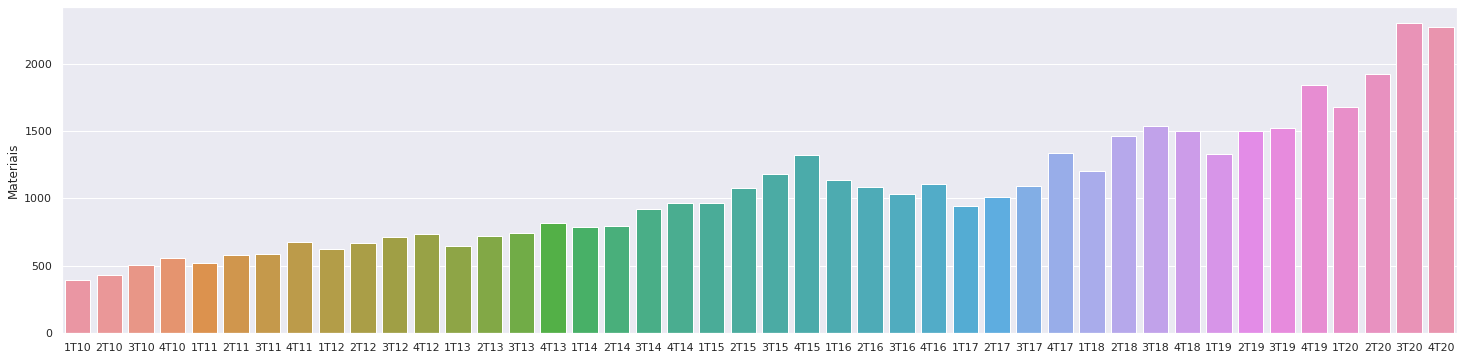

In [21]:
del dados['2009']
sns.set_theme(style='darkgrid') #seta a cor de fundo do grafico

ax = sns.barplot(y=abs(dados.loc['Materiais'],), x=['1T10', '2T10', '3T10', '4T10', '1T11', '2T11', '3T11', '4T11',
       '1T12', '2T12', '3T12', '4T12', '1T13', '2T13', '3T13', '4T13', '1T14',
       '2T14', '3T14', '4T14', '1T15', '2T15', '3T15', '4T15', '1T16', '2T16',
       '3T16', '4T16', '1T17', '2T17', '3T17', '4T17', '1T18', '2T18', '3T18',
       '4T18', '1T19', '2T19', '3T19', '4T19', '1T20', '2T20', '3T20', '4T20'])
ax.figure.set_size_inches(25,6)


In [22]:
df_custos = pd.DataFrame({'Materiais':dados.loc['Materiais'],'Pessoal':dados.loc['Pessoal'],
                          'Depreciação':dados.loc['Depreciação'],'Outros':dados.loc['Outros'], 'Total': dados.loc[' Custo dos Bens e/ou Serviços Vendidos '] })
df_custos.head()

,Materiais,Pessoal,Depreciação,Outros,Total
1T10,-392.679,-155.825,-24.932,-56.097,-623.3
2T10,-428.952,-168.768,-42.192,-70.320,-703.2
3T10,-503.068,-186.622,-40.570,-81.140,-811.4
4T10,-554.944,-190.762,-43.355,-86.710,-867.1
1T11,-521.920,-179.410,-40.775,-73.395,-815.5


In [23]:
lista_das_colunas = []
nova_lista=[]

lista_das_colunas = ['1T10', '2T10', '3T10', '4T10', '1T11', '2T11', '3T11', '4T11',
       '1T12', '2T12', '3T12', '4T12', '1T13', '2T13', '3T13', '4T13', '1T14',
       '2T14', '3T14', '4T14', '1T15', '2T15', '3T15', '4T15', '1T16', '2T16',
       '3T16', '4T16', '1T17', '2T17', '3T17', '4T17', '1T18', '2T18', '3T18',
       '4T18', '1T19', '2T19', '3T19', '4T19', '1T20', '2T20', '3T20', '4T20']
for i in lista_das_colunas:
  nova_lista.append(i.replace(i[1], 'Q'))



In [62]:
nova_data=[]
nova_data = pd.to_datetime(nova_lista)
nova_data = nova_data.strftime("%m-%Y")
nova_data

Index(['01-2010', '04-2010', '07-2010', '10-2010', '01-2011', '04-2011',
       '07-2011', '10-2011', '01-2012', '04-2012', '07-2012', '10-2012',
       '01-2013', '04-2013', '07-2013', '10-2013', '01-2014', '04-2014',
       '07-2014', '10-2014', '01-2015', '04-2015', '07-2015', '10-2015',
       '01-2016', '04-2016', '07-2016', '10-2016', '01-2017', '04-2017',
       '07-2017', '10-2017', '01-2018', '04-2018', '07-2018', '10-2018',
       '01-2019', '04-2019', '07-2019', '10-2019', '01-2020', '04-2020',
       '07-2020', '10-2020'],
      dtype='object')

In [25]:
dicionario_index = {}
for i in range(len(lista_das_colunas)):
  dicionario_index[lista_das_colunas[i]]= nova_data[i]

In [66]:
df_custos.rename(index=dicionario_index, inplace=True)
df_custos.index = pd.to_datetime(df_custos.index).strftime("%Y")
df_custos.head()

,Materiais,Pessoal,Depreciação,Outros,Total
Contas,,,,,
2010,-392.679,-155.825,-24.932,-56.097,-623.3
2010,-428.952,-168.768,-42.192,-70.320,-703.2
2010,-503.068,-186.622,-40.570,-81.140,-811.4
2010,-554.944,-190.762,-43.355,-86.710,-867.1
2011,-521.920,-179.410,-40.775,-73.395,-815.5


In [27]:
df_custos.rename_axis('Contas', inplace=True)
df_custos.head()

,Materiais,Pessoal,Depreciação,Outros,Total
Contas,,,,,
2010,-392.679,-155.825,-24.932,-56.097,-623.3
2010,-428.952,-168.768,-42.192,-70.320,-703.2
2010,-503.068,-186.622,-40.570,-81.140,-811.4
2010,-554.944,-190.762,-43.355,-86.710,-867.1
2011,-521.920,-179.410,-40.775,-73.395,-815.5


In [28]:
table = pd.pivot_table(df_custos, values=[df_custos.columns[0],	df_custos.columns[1],	df_custos.columns[2],df_custos.columns[3]	], index=df_custos.index)
table.head()


,Depreciação,Materiais,Outros,Pessoal
Contas,,,,
2010,-37.76225,-469.91075,-73.56675,-175.49425
2011,-42.86025,-590.94600,-81.75150,-197.27975
2012,-42.93200,-687.07725,-94.15250,-238.40525
2013,-48.45600,-731.88200,-112.26750,-257.95450
2014,-53.56200,-867.27200,-117.48175,-300.73425


In [48]:
dados_vf.head()

Descrição da Conta,Receita de Venda de Bens e/ou Serviços,Mercado Interno (Nota explicativa 22),Mercado Externo (Nota explicativa 22),Custo dos Bens e/ou Serviços Vendidos,Materiais,Pessoal,Depreciação,Outros,Resultado Bruto,Despesas/Receitas Operacionais,Despesas com Vendas,Despesas Gerais e Administrativas,Honorários dos Administradores,Outras Despesas Administrativas,Outras Receitas Operacionais,Outras Despesas Operacionais (Nota explicativa 25),Participação nos resultados - colaboradores,Participação nos resultados - controladas no exterior,Participação dos Administradores,Provisão/Reversão de processos tributários,Incentivos fiscais da Lei Rouanet,Plano baseado em ações,Outras,Resultado de Equivalência Patrimonial,Resultado Antes do Resultado Financeiro e dos Tributos,Resultado Financeiro,Receitas Financeiras (Nota explicativa 26),Rendimento de aplicações financeiras,Variação cambial,Variação cambial - Fornecedores,Variação cambial - Clientes,Variação cambial - Empréstimos,Variação cambial - Outras,Ajuste a valor presente - clientes,PIS/COFINS s/ juros capital próprio,PIS/COFINS s/ receitas financeiras,Derivativos,PROEX - Equaliz. Taxa de Juros,Outras receitas,Despesas Financeiras (Nota explicativa 26),...,Variação cambial,Variação cambial - Fornecedores,Variação cambial - Clientes,Variação cambial - Empréstimos,Variação cambial - Outras,Ajuste a valor presente - fornecedores,Derivativos,Outras despesas,Resultado Antes dos Tributos sobre o Lucro,IRPJ e CSLL calculados a alíquota nominal (Nota explicativa 27),Resultado de investimentos em controladas,Diferença de alíquotas s/ resultados no exterior,Incentivos fiscais,Crédito Financeiro da Lei de Informática - IRPJ/CSLL,Reintegra,Juros sobre o capital próprio,Ajuste de consolidação - Lucros a realizar,Provisão IRPJ/CSLL (Lei do Bem),Outros Ajustes,Imposto de Renda e Contribuição Social sobre o Lucro,Corrente,Diferido,Resultado Líquido das Operações Continuadas,Lucro/Prejuízo Consolidado do Período,Atribuído a Sócios da Empresa Controladora,Atribuído a Sócios Não Controladores,ON,Lucro Diluído por Ação,ON,Depreciação e Amortização,Despesas com Pessoal,Matérias Primas e Materiais de Uso e Consumo,Fretes e Seguros,Outras Despesas,Custo dos Produtos e Serviços Vendidos,Despesas com Vendas,Despesas Gerais e Administrativas,Honorários dos Administradores,Outras Despesas,Resultado da equivalência patrimonial
1T10,931.9,614.5,317.4,-623.3,-392.679,-155.825,-24.932,-56.097,308.6,-169.0,-93.1,-57.9,-3.9,-54.0,8.5,-26.5,-19.0,-1.1,-0.8,-0.9,-0.4,0.0,-4.4,-0.1,139.6,18.6,71.3,41.0,16.6,0.0,0.0,0.0,0.0,12.2,-2.8,0.0,0.0,0.0,4.3,-52.7,...,-14.5,0.0,0.0,0.0,0.0,-4.0,0.0,-6.8,158.2,-53.8,-0.6,-1.1,5.3,0.0,0.0,10.7,0.0,0.0,1.7,-37.7,-25.5,-12.3,120.5,120.5,119.6,0.8,0.10,0.0,0.10,-44.1,-224.0,-380.9,-19.4,-123.8,-623.3,-93.1,-54.0,-3.9,-18.0,-0.1
2T10,1013.0,629.1,384.0,-703.2,-428.952,-168.768,-42.192,-70.320,309.8,-180.1,-100.3,-65.1,-4.2,-60.9,2.1,-18.2,-13.8,-1.5,-0.4,-1.6,-0.8,0.0,-0.1,1.3,129.7,28.1,87.4,46.3,22.4,0.0,0.0,0.0,0.0,13.2,-3.2,0.0,0.0,0.0,8.8,-59.3,...,-23.3,0.0,0.0,0.0,0.0,-2.2,0.0,-6.4,157.8,-52.6,0.7,-1.2,4.9,0.0,0.0,12.4,0.0,0.0,-5.1,-40.9,-40.8,-0.1,117.0,117.0,116.5,0.4,0.09,0.0,0.09,-44.9,-243.6,-426.9,-23.0,-145.0,-703.2,-100.3,-60.9,-4.2,-16.1,1.3
3T10,1188.6,690.4,498.2,-811.4,-503.068,-186.622,-40.570,-81.140,377.2,-210.6,-121.6,-71.1,-4.0,-67.2,5.5,-23.9,-20.6,-1.6,-0.9,4.7,0.0,0.0,-5.5,0.5,166.6,40.2,92.1,56.7,13.7,0.0,0.0,0.0,0.0,13.9,-2.9,0.0,0.0,0.0,10.7,-51.9,...,-9.7,0.0,0.0,0.0,0.0,-2.5,0.0,-11.0,206.8,-71.3,-1.9,-2.4,5.4,0.0,0.0,11.7,0.0,0.0,1.2,-57.4,-50.4,-6.9,149.4,149.4,142.1,7.3,0.11,0.0,0.11,-46.9,-260.9,-524.8,-33.0,-156.4,-811.4,-121.6,-67.2,-4.0,-18.4,0.5
4T10,1258.4,736.4,522.0,-867.1,-554.944,-190.762,-43.355,-86.710,391.3,-224.6,-119.3,-68.7,-5.3,-63.4,3.9,-40.9,-26.2,-1.0,-2.2,-3.3,-1.3,0.0,-6.9,0.4,166.7,36.2,97.7,61.0,27.1,0.0,0.0,0.0,0.0,18.5,-2.7,0.0,0.0,0.0,-6.2,-61.5,...,-15.5,0.0,0.0,0.0,0.0,-3.5,0.0,-3.1,202.9,-69.0,-0.3,-6.0,6.1,0

In [68]:
dados_vf['Ano'] =  df_custos.index
dados_vf.head()

Descrição da Conta,Receita de Venda de Bens e/ou Serviços,Mercado Interno (Nota explicativa 22),Mercado Externo (Nota explicativa 22),Custo dos Bens e/ou Serviços Vendidos,Materiais,Pessoal,Depreciação,Outros,Resultado Bruto,Despesas/Receitas Operacionais,Despesas com Vendas,Despesas Gerais e Administrativas,Honorários dos Administradores,Outras Despesas Administrativas,Outras Receitas Operacionais,Outras Despesas Operacionais (Nota explicativa 25),Participação nos resultados - colaboradores,Participação nos resultados - controladas no exterior,Participação dos Administradores,Provisão/Reversão de processos tributários,Incentivos fiscais da Lei Rouanet,Plano baseado em ações,Outras,Resultado de Equivalência Patrimonial,Resultado Antes do Resultado Financeiro e dos Tributos,Resultado Financeiro,Receitas Financeiras (Nota explicativa 26),Rendimento de aplicações financeiras,Variação cambial,Variação cambial - Fornecedores,Variação cambial - Clientes,Variação cambial - Empréstimos,Variação cambial - Outras,Ajuste a valor presente - clientes,PIS/COFINS s/ juros capital próprio,PIS/COFINS s/ receitas financeiras,Derivativos,PROEX - Equaliz. Taxa de Juros,Outras receitas,Despesas Financeiras (Nota explicativa 26),...,Variação cambial - Fornecedores,Variação cambial - Clientes,Variação cambial - Empréstimos,Variação cambial - Outras,Ajuste a valor presente - fornecedores,Derivativos,Outras despesas,Resultado Antes dos Tributos sobre o Lucro,IRPJ e CSLL calculados a alíquota nominal (Nota explicativa 27),Resultado de investimentos em controladas,Diferença de alíquotas s/ resultados no exterior,Incentivos fiscais,Crédito Financeiro da Lei de Informática - IRPJ/CSLL,Reintegra,Juros sobre o capital próprio,Ajuste de consolidação - Lucros a realizar,Provisão IRPJ/CSLL (Lei do Bem),Outros Ajustes,Imposto de Renda e Contribuição Social sobre o Lucro,Corrente,Diferido,Resultado Líquido das Operações Continuadas,Lucro/Prejuízo Consolidado do Período,Atribuído a Sócios da Empresa Controladora,Atribuído a Sócios Não Controladores,ON,Lucro Diluído por Ação,ON,Depreciação e Amortização,Despesas com Pessoal,Matérias Primas e Materiais de Uso e Consumo,Fretes e Seguros,Outras Despesas,Custo dos Produtos e Serviços Vendidos,Despesas com Vendas,Despesas Gerais e Administrativas,Honorários dos Administradores,Outras Despesas,Resultado da equivalência patrimonial,Ano
1T10,931.9,614.5,317.4,-623.3,-392.679,-155.825,-24.932,-56.097,308.6,-169.0,-93.1,-57.9,-3.9,-54.0,8.5,-26.5,-19.0,-1.1,-0.8,-0.9,-0.4,0.0,-4.4,-0.1,139.6,18.6,71.3,41.0,16.6,0.0,0.0,0.0,0.0,12.2,-2.8,0.0,0.0,0.0,4.3,-52.7,...,0.0,0.0,0.0,0.0,-4.0,0.0,-6.8,158.2,-53.8,-0.6,-1.1,5.3,0.0,0.0,10.7,0.0,0.0,1.7,-37.7,-25.5,-12.3,120.5,120.5,119.6,0.8,0.10,0.0,0.10,-44.1,-224.0,-380.9,-19.4,-123.8,-623.3,-93.1,-54.0,-3.9,-18.0,-0.1,2010
2T10,1013.0,629.1,384.0,-703.2,-428.952,-168.768,-42.192,-70.320,309.8,-180.1,-100.3,-65.1,-4.2,-60.9,2.1,-18.2,-13.8,-1.5,-0.4,-1.6,-0.8,0.0,-0.1,1.3,129.7,28.1,87.4,46.3,22.4,0.0,0.0,0.0,0.0,13.2,-3.2,0.0,0.0,0.0,8.8,-59.3,...,0.0,0.0,0.0,0.0,-2.2,0.0,-6.4,157.8,-52.6,0.7,-1.2,4.9,0.0,0.0,12.4,0.0,0.0,-5.1,-40.9,-40.8,-0.1,117.0,117.0,116.5,0.4,0.09,0.0,0.09,-44.9,-243.6,-426.9,-23.0,-145.0,-703.2,-100.3,-60.9,-4.2,-16.1,1.3,2010
3T10,1188.6,690.4,498.2,-811.4,-503.068,-186.622,-40.570,-81.140,377.2,-210.6,-121.6,-71.1,-4.0,-67.2,5.5,-23.9,-20.6,-1.6,-0.9,4.7,0.0,0.0,-5.5,0.5,166.6,40.2,92.1,56.7,13.7,0.0,0.0,0.0,0.0,13.9,-2.9,0.0,0.0,0.0,10.7,-51.9,...,0.0,0.0,0.0,0.0,-2.5,0.0,-11.0,206.8,-71.3,-1.9,-2.4,5.4,0.0,0.0,11.7,0.0,0.0,1.2,-57.4,-50.4,-6.9,149.4,149.4,142.1,7.3,0.11,0.0,0.11,-46.9,-260.9,-524.8,-33.0,-156.4,-811.4,-121.6,-67.2,-4.0,-18.4,0.5,2010
4T10,1258.4,736.4,522.0,-867.1,-554.944,-190.762,-43.355,-86.710,391.3,-224.6,-119.3,-68.7,-5.3,-63.4,3.9,-40.9,-26.2,-1.0,-2.2,-3.3,-1.3,0.0,-6.9,0.4,166.7,36.2,97.7,61.0,27.1,0.0,0.0,0.0,0.0,18.5,-2.7,0.0,0.0,0.0,-6.2,-61.5,...,0.0,0.0,0.0,0.0,-3.5,0.0,-3.1,202.9,-69.0,-0.3,-6.0,6.1,0.0,0.0,12.4,0.0,0.0,0

In [80]:
dados_vf = dados_vf.pivot_table(dados_vf,index = ['Ano', dados_vf.index],)
dados_vf.head(10)

Descrição da Conta   Ajuste de consolidação - Lucros a realizar   ...  Variação cambial - Outras
Ano                                                               ...                           
2010 1T10                                                    0.0  ...                        0.0
     2T10                                                    0.0  ...                        0.0
     3T10                                                    0.0  ...                        0.0
     4T10                                                    0.0  ...                        0.0
2011 1T11                                                    0.0  ...                        0.0
     2T11                                                    0.0  ...                        0.0
     3T11                                                    0.0  ...                        0.0
     4T11                                                    0.0  ...                        0.0
2012 1T12                                                    0.0  ...                        0.0
     2T12                                                    0.0  ...                        0.0

[10 rows x 81 columns]

# 2. Análise de Resultado
***
Selic considerada:
* 2010 a 2020 = 8,92% a.a
* 2011 a 2020 = 8,74% a.a
* 2012 a 2020 = 8,51% a.a
* 2013 a 2020 = 8,68% a.a
* 2014 a 2020 = 8,50% a.a
* 2015 a 2020 = 8,06% a.a
* 2016 a 2020 = 6,85% a.a
* 2017 a 2020 = 5,15% a.a
* 2018 a 2020 = 4,4% a.a
* 2019 a 2020 = 3,4% a.a
* 2020  = 1.9 %

fonte: https://www.bcb.gov.br/controleinflacao/historicotaxasjuros

*Taxa média diária de juros, anualizada com base em 252 dias úteis*


In [81]:
dicionario_selic={'2010':[0.0892,10],'2011':[0.0874,9],'2012':[0.0851,8],'2013':[0.0868,7],'2014':[0.0858,6],'2015':[0.0806,6],'2016':[0.0685,5],'2017':[0.0515,4],'2018':[0.044,3],'2019':[0.034,2],'2020':[0.0190,1]}

## 2.1 Análise dos Custos
***

In [31]:
table.head()

,Depreciação,Materiais,Outros,Pessoal
Contas,,,,
2010,-37.76225,-469.91075,-73.56675,-175.49425
2011,-42.86025,-590.94600,-81.75150,-197.27975
2012,-42.93200,-687.07725,-94.15250,-238.40525
2013,-48.45600,-731.88200,-112.26750,-257.95450
2014,-53.56200,-867.27200,-117.48175,-300.73425


### 2.1.1 - Depreciação
***

In [32]:
depreciacao = table['Depreciação'].abs()

In [33]:
depreciacao.head()

Contas
2010    37.76225
2011    42.86025
2012    42.93200
2013    48.45600
2014    53.56200
Name: Depreciação, dtype: float64

In [34]:
depreciacao[0]

37.762249999999995

In [35]:
depreciacao.describe()

count    11.000000
mean     63.112091
std      19.759232
min      37.762250
25%      45.694000
50%      62.737500
75%      76.728625
max      96.782250
Name: Depreciação, dtype: float64

Depreciação será trazida a valor presente para análise das estatítsticas:
***

In [36]:
depreciacao_vp = depreciacao
count=0
for i in depreciacao:
  depreciacao_vp[count] = np.fv(dicionario_selic[depreciacao_vp.index[count]][0],dicionario_selic[depreciacao_vp.index[count]][1], 0, -i)
  count+=1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: numpy.fv is deprecated and will be removed from NumPy 1.20. Use numpy_financial.fv instead (https://pypi.org/project/numpy-financial/).
  after removing the cwd from sys.path.


In [37]:
depreciacao_vp

Contas
2010     88.743017
2011     91.108450
2012     82.516202
2013     86.775069
2014     87.771963
2015    117.305208
2016    111.114851
2017     76.694517
2018     77.748259
2019     93.398261
2020     98.621113
Name: Depreciação, dtype: float64

In [38]:
depreciacao_vp.rename_axis('Ano')

Ano
2010     88.743017
2011     91.108450
2012     82.516202
2013     86.775069
2014     87.771963
2015    117.305208
2016    111.114851
2017     76.694517
2018     77.748259
2019     93.398261
2020     98.621113
Name: Depreciação, dtype: float64

In [39]:
depreciacao_vp.describe()

count     11.000000
mean      91.981537
std       12.788326
min       76.694517
25%       84.645635
50%       88.743017
75%       96.009687
max      117.305208
Name: Depreciação, dtype: float64

Text(0.5, 0, 'R$ milhões')

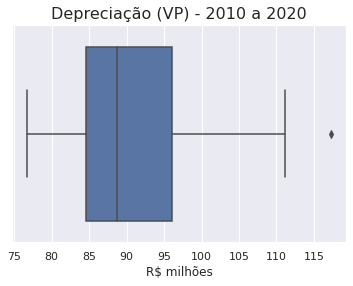

In [40]:
sns.set_theme(style='darkgrid')
ax = sns.boxplot(x=depreciacao_vp)
ax.set_title('Depreciação (VP) - 2010 a 2020', fontsize=16,)
ax.set_xlabel('R$ milhões')